<a href="https://colab.research.google.com/github/mille055/AIPI531/blob/main/AIPI531_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 531
**Homework 3**

Chad Miller


1. Build a pipeline for offline RL using d3rlpy:
Hint: In this homework, you will implement a simple pipeline for offline RL using the APIs provided in d3rlpy repository.
[Required] Train CQL:
- Pick (any) one environment/dataset in d3rlpy
(https://github.com/takuseno/d3rlpy).
- Train your CQL agent with the data from the behavior policy.
- Generate true Q vs training steps (may include different dataset sizes, task difficulties) plots.
- Generate estimated Q vs training steps (may include different dataset sizes, task difficulties) plots.
[Optional] Train OPE (FQE):
- Train OPE (FQE) to evaluate the trained policy.
- Generate estimated Q vs training steps (may include different trained policies) plots.
  
 - Include the true Q in the same plots. [Requirements]:
- Build a pipeline for offline RL (data processing, training, evaluation).
- Compare the true Q value with estimated Q value for both offline RL training and offline evaluation (optional).
[Software Setup for Development]:
1. git clone the d3rlpy source code repo (development version) to your local machine (no need to install it on your local machine). https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht ml#install-from-source
2. Download the Google Drive Desktop (to sync with your Google Drive). https://www.google.com/drive/download/
3. Sync the cloned d3rlpy code repo (on your local machine) with the one in your Google Drive using Google Drive Desktop.
4. Connect the cloned d3rlpy code repo stored in your Google Drive with your Google Colab notebook.
5. Install the cloned d3rlpy code repo in your Google Drive using Google Colab (install it on Colab).
   
https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht
ml#install-from-source
6. Use any editor (e.g. Sublime, PyCharm, etc.) for the code implementation (modify the code in the cloned d3rlpy repo on your local machine).
7. Test your implementation and running experiments using Colab.
8. Push your code in the cloned d3rlpy repo on your local machine to your repo in your GitHub account.
[Submission]:
(We don’t need a link to your Google Drive. We only need the link to your GitHub using the Colab notebook)
1. Create a new Colab notebook.
2. !pip install git+”your github URL”
3. Training/testing experiments using the Colab notebook.

# Setup

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# installing my fork of the d3rlpy repo which contains modifications for this homework assignment
!pip install git+'https://github.com/mille055/AIPI531-d3rlpy.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mille055/AIPI531-d3rlpy.git to /tmp/pip-req-build-8_dlnp06
  Running command git clone --filter=blob:none --quiet https://github.com/mille055/AIPI531-d3rlpy.git /tmp/pip-req-build-8_dlnp06
  Resolved https://github.com/mille055/AIPI531-d3rlpy.git to commit bdbbb37bf7fe9411a23907b06aff7405de749a08
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 KB 7.5 MB/s eta 0:00:00
  Created wheel for d3rlpy: filename=d3rlpy-1.1.1-cp39-cp39-linux_x86_64.whl size=1258788 sha256=df5ef1aa67368c29935801e3e0f753a646c7566a98e9b121787f1f32482e7354
  Stored in directory: /tmp/pip-ephem-wheel-cache-jna761la/wheels/c7/1d/0b/17e98dce5ba7216cdb795e775bd7691f7dee958f7153c023d2
Successfully built d3rlpy


In [3]:
!pip install -e .[all]
!pip install gym[all]
!pip install -e .[docs,tests,extra] 
#!pip install git+https://github.com/rail-berkeley/d4rl
#!pip install git+https://github.com/takuseno/d4rl-atari
#!pip install gym[atari]
!pip install --upgrade gym==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 85.2 MB/s

In [5]:
import d3rlpy
from d3rlpy.algos import CQL
from d3rlpy.algos.cql import DiscreteCQL

from d3rlpy.dataset import MDPDataset
from d3rlpy.datasets import get_atari, get_cartpole

from d3rlpy.metrics import initial_state_value_estimation_scorer
#import true_q_scorer which was added to the repo for this homework assignment
from d3rlpy.metrics.scorer import average_value_estimation_scorer, true_q_scorer

from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import gym
import shutil


In [11]:


shutil.rmtree('/content/d3rlpy_logs', ignore_errors=True)


# prepare dataset
dataset, env = get_cartpole()

# split dataset
train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

# prepare algorithm
cql = DiscreteCQL(use_gpu=True)

# start training
results = cql.fit(
    train_episodes,
    eval_episodes=test_episodes,
    n_epochs=100,
    scorers={
        "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer
    },
    experiment_name = "CQL-cartpole" 
)

2023-03-23 01:44:33 [debug    ] RoundIterator is selected.
2023-03-23 01:44:33 [info     ] Directory is created at d3rlpy_logs/CQL-cartpole_20230323014433
2023-03-23 01:44:33 [debug    ] Building models...
2023-03-23 01:44:33 [debug    ] Models have been built.
2023-03-23 01:44:33 [info     ] Parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': 0, 'algorithm': 'DiscreteCQL', 'observation_

Epoch 1/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:44:50 [info     ] CQL-cartpole_20230323014433: epoch=1 step=2422 epoch=1 metrics={'time_sample_batch': 0.00017370270068344255, 'time_algorithm_update': 0.00625844419150191, 'loss': 0.6839166220360605, 'time_step': 0.00653707705481204, 'estimated_q': 1.0580863952636719, 'true_q': 2.014772653579712} step=2422
2023-03-23 01:44:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_2422.pt


Epoch 2/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:45:08 [info     ] CQL-cartpole_20230323014433: epoch=2 step=4844 epoch=2 metrics={'time_sample_batch': 0.00018611789045010983, 'time_algorithm_update': 0.006281489778608453, 'loss': 0.6673348100592931, 'time_step': 0.0065555641416869415, 'estimated_q': 1.091294288635254, 'true_q': 2.025832176208496} step=4844
2023-03-23 01:45:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_4844.pt


Epoch 3/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:45:25 [info     ] CQL-cartpole_20230323014433: epoch=3 step=7266 epoch=3 metrics={'time_sample_batch': 0.000155114025049816, 'time_algorithm_update': 0.006557892709601329, 'loss': 0.665450314959645, 'time_step': 0.006816980171361116, 'estimated_q': 1.0772480964660645, 'true_q': 2.0132927894592285} step=7266
2023-03-23 01:45:25 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_7266.pt


Epoch 4/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:45:43 [info     ] CQL-cartpole_20230323014433: epoch=4 step=9688 epoch=4 metrics={'time_sample_batch': 0.000150871513108396, 'time_algorithm_update': 0.00629800858328305, 'loss': 0.6761439746071936, 'time_step': 0.0065420631728420366, 'estimated_q': 2.143336534500122, 'true_q': 3.034982681274414} step=9688
2023-03-23 01:45:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_9688.pt


Epoch 5/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:46:00 [info     ] CQL-cartpole_20230323014433: epoch=5 step=12110 epoch=5 metrics={'time_sample_batch': 0.00015933980240888777, 'time_algorithm_update': 0.006284140339574963, 'loss': 0.6759993463730044, 'time_step': 0.006535863600714358, 'estimated_q': 2.1344003677368164, 'true_q': 2.9961862564086914} step=12110
2023-03-23 01:46:00 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_12110.pt


Epoch 6/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:46:16 [info     ] CQL-cartpole_20230323014433: epoch=6 step=14532 epoch=6 metrics={'time_sample_batch': 0.0001414113552682563, 'time_algorithm_update': 0.0062497367945512795, 'loss': 0.675189439419574, 'time_step': 0.006484241154841605, 'estimated_q': 2.130253314971924, 'true_q': 2.987593650817871} step=14532
2023-03-23 01:46:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_14532.pt


Epoch 7/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:46:33 [info     ] CQL-cartpole_20230323014433: epoch=7 step=16954 epoch=7 metrics={'time_sample_batch': 0.00017382614283794023, 'time_algorithm_update': 0.006278342594301081, 'loss': 0.6823125403592845, 'time_step': 0.0065387787649594095, 'estimated_q': 3.134080648422241, 'true_q': 3.9391679763793945} step=16954
2023-03-23 01:46:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_16954.pt


Epoch 8/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:46:51 [info     ] CQL-cartpole_20230323014433: epoch=8 step=19376 epoch=8 metrics={'time_sample_batch': 0.000126614046923687, 'time_algorithm_update': 0.006289799778447675, 'loss': 0.6878141009984776, 'time_step': 0.006509312709238192, 'estimated_q': 3.1197335720062256, 'true_q': 3.9252471923828125} step=19376
2023-03-23 01:46:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_19376.pt


Epoch 9/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:47:09 [info     ] CQL-cartpole_20230323014433: epoch=9 step=21798 epoch=9 metrics={'time_sample_batch': 0.00019004274064307367, 'time_algorithm_update': 0.006441816133866125, 'loss': 0.6869788300784337, 'time_step': 0.006735306254701119, 'estimated_q': 3.1251583099365234, 'true_q': 3.91467022895813} step=21798
2023-03-23 01:47:09 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_21798.pt


Epoch 10/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:47:26 [info     ] CQL-cartpole_20230323014433: epoch=10 step=24220 epoch=10 metrics={'time_sample_batch': 0.000147820404991446, 'time_algorithm_update': 0.006280725205072581, 'loss': 0.6900958443948004, 'time_step': 0.006521699745531027, 'estimated_q': 4.158782005310059, 'true_q': 4.888095855712891} step=24220
2023-03-23 01:47:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_24220.pt


Epoch 11/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:47:43 [info     ] CQL-cartpole_20230323014433: epoch=11 step=26642 epoch=11 metrics={'time_sample_batch': 0.00016317763277364113, 'time_algorithm_update': 0.006265219925455964, 'loss': 0.7003951034547867, 'time_step': 0.0065244915660603005, 'estimated_q': 4.1719465255737305, 'true_q': 4.895705223083496} step=26642
2023-03-23 01:47:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_26642.pt


Epoch 12/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:48:00 [info     ] CQL-cartpole_20230323014433: epoch=12 step=29064 epoch=12 metrics={'time_sample_batch': 0.00013315027947272278, 'time_algorithm_update': 0.006272290483375505, 'loss': 0.6998470627651247, 'time_step': 0.0064959675688865655, 'estimated_q': 4.228859901428223, 'true_q': 4.933542251586914} step=29064
2023-03-23 01:48:00 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_29064.pt


Epoch 13/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:48:16 [info     ] CQL-cartpole_20230323014433: epoch=13 step=31486 epoch=13 metrics={'time_sample_batch': 0.000147020984148802, 'time_algorithm_update': 0.006238583982925982, 'loss': 0.6992406318937817, 'time_step': 0.006479749100745758, 'estimated_q': 4.186842441558838, 'true_q': 4.8816375732421875} step=31486
2023-03-23 01:48:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_31486.pt


Epoch 14/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:48:34 [info     ] CQL-cartpole_20230323014433: epoch=14 step=33908 epoch=14 metrics={'time_sample_batch': 0.00016071351474223307, 'time_algorithm_update': 0.006324702309341494, 'loss': 0.709952687843096, 'time_step': 0.006587169566103292, 'estimated_q': 5.203062534332275, 'true_q': 5.890109539031982} step=33908
2023-03-23 01:48:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_33908.pt


Epoch 15/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:48:52 [info     ] CQL-cartpole_20230323014433: epoch=15 step=36330 epoch=15 metrics={'time_sample_batch': 0.00018677605172999135, 'time_algorithm_update': 0.006438794065171485, 'loss': 0.7099276886411583, 'time_step': 0.006734024385693248, 'estimated_q': 5.175163269042969, 'true_q': 5.885067462921143} step=36330
2023-03-23 01:48:52 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_36330.pt


Epoch 16/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:49:09 [info     ] CQL-cartpole_20230323014433: epoch=16 step=38752 epoch=16 metrics={'time_sample_batch': 0.000161423848543553, 'time_algorithm_update': 0.0062301600894880725, 'loss': 0.7094047316876844, 'time_step': 0.006491621696289466, 'estimated_q': 5.195245742797852, 'true_q': 5.849024295806885} step=38752
2023-03-23 01:49:09 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_38752.pt


Epoch 17/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:49:26 [info     ] CQL-cartpole_20230323014433: epoch=17 step=41174 epoch=17 metrics={'time_sample_batch': 0.00017431538327482494, 'time_algorithm_update': 0.006254841728115948, 'loss': 0.7172729104732699, 'time_step': 0.006523687813913989, 'estimated_q': 6.1696648597717285, 'true_q': 6.807887554168701} step=41174
2023-03-23 01:49:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_41174.pt


Epoch 18/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:49:43 [info     ] CQL-cartpole_20230323014433: epoch=18 step=43596 epoch=18 metrics={'time_sample_batch': 0.00013870625925103462, 'time_algorithm_update': 0.006328486982797612, 'loss': 0.7215807075888336, 'time_step': 0.006568051388596425, 'estimated_q': 6.195213794708252, 'true_q': 6.81472635269165} step=43596
2023-03-23 01:49:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_43596.pt


Epoch 19/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:50:00 [info     ] CQL-cartpole_20230323014433: epoch=19 step=46018 epoch=19 metrics={'time_sample_batch': 0.00016247271310190442, 'time_algorithm_update': 0.006390131080967645, 'loss': 0.7211636616906089, 'time_step': 0.006657577565049062, 'estimated_q': 6.182985782623291, 'true_q': 6.81105375289917} step=46018
2023-03-23 01:50:00 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_46018.pt


Epoch 20/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:50:18 [info     ] CQL-cartpole_20230323014433: epoch=20 step=48440 epoch=20 metrics={'time_sample_batch': 0.0001612503010807305, 'time_algorithm_update': 0.006257212526241085, 'loss': 0.7240714247220809, 'time_step': 0.006520133880816837, 'estimated_q': 7.181709289550781, 'true_q': 7.759217262268066} step=48440
2023-03-23 01:50:18 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_48440.pt


Epoch 21/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:50:36 [info     ] CQL-cartpole_20230323014433: epoch=21 step=50862 epoch=21 metrics={'time_sample_batch': 0.0002040742941871347, 'time_algorithm_update': 0.006538510814764399, 'loss': 0.7304010322574345, 'time_step': 0.006854130747296612, 'estimated_q': 7.179694652557373, 'true_q': 7.7227301597595215} step=50862
2023-03-23 01:50:36 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_50862.pt


Epoch 22/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:50:53 [info     ] CQL-cartpole_20230323014433: epoch=22 step=53284 epoch=22 metrics={'time_sample_batch': 0.00015071302676968688, 'time_algorithm_update': 0.006302417653538194, 'loss': 0.7301387432731941, 'time_step': 0.006556993668774353, 'estimated_q': 7.208252906799316, 'true_q': 7.7147088050842285} step=53284
2023-03-23 01:50:53 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_53284.pt


Epoch 23/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:51:10 [info     ] CQL-cartpole_20230323014433: epoch=23 step=55706 epoch=23 metrics={'time_sample_batch': 0.00015216637602726552, 'time_algorithm_update': 0.006319599147673779, 'loss': 0.7293815073840978, 'time_step': 0.006576476857053849, 'estimated_q': 7.2296953201293945, 'true_q': 7.75962495803833} step=55706
2023-03-23 01:51:10 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_55706.pt


Epoch 24/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:51:27 [info     ] CQL-cartpole_20230323014433: epoch=24 step=58128 epoch=24 metrics={'time_sample_batch': 0.00018283860138090655, 'time_algorithm_update': 0.006314051239870482, 'loss': 0.7416876702147215, 'time_step': 0.0065980816950589345, 'estimated_q': 8.173418045043945, 'true_q': 8.653705596923828} step=58128
2023-03-23 01:51:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_58128.pt


Epoch 25/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:51:44 [info     ] CQL-cartpole_20230323014433: epoch=25 step=60550 epoch=25 metrics={'time_sample_batch': 0.00013491341538118194, 'time_algorithm_update': 0.006336319850162472, 'loss': 0.7407525710632347, 'time_step': 0.006571804463223521, 'estimated_q': 8.187788009643555, 'true_q': 8.629558563232422} step=60550
2023-03-23 01:51:44 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_60550.pt


Epoch 26/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:52:02 [info     ] CQL-cartpole_20230323014433: epoch=26 step=62972 epoch=26 metrics={'time_sample_batch': 0.0001861874866249343, 'time_algorithm_update': 0.006344910400352824, 'loss': 0.7403143517839131, 'time_step': 0.006632902817131565, 'estimated_q': 8.157369613647461, 'true_q': 8.65060043334961} step=62972
2023-03-23 01:52:02 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_62972.pt


Epoch 27/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:52:20 [info     ] CQL-cartpole_20230323014433: epoch=27 step=65394 epoch=27 metrics={'time_sample_batch': 0.0001923962135535444, 'time_algorithm_update': 0.006444751478048714, 'loss': 0.7480836443719935, 'time_step': 0.0067470797224540935, 'estimated_q': 9.152666091918945, 'true_q': 9.526089668273926} step=65394
2023-03-23 01:52:20 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_65394.pt


Epoch 28/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:52:37 [info     ] CQL-cartpole_20230323014433: epoch=28 step=67816 epoch=28 metrics={'time_sample_batch': 0.00015830629429080878, 'time_algorithm_update': 0.006420264748085835, 'loss': 0.7504809236201642, 'time_step': 0.006685496065657952, 'estimated_q': 9.115384101867676, 'true_q': 9.51761531829834} step=67816
2023-03-23 01:52:37 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_67816.pt


Epoch 29/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:52:54 [info     ] CQL-cartpole_20230323014433: epoch=29 step=70238 epoch=29 metrics={'time_sample_batch': 0.00016712640357549087, 'time_algorithm_update': 0.0063310790711646235, 'loss': 0.7498060412194294, 'time_step': 0.00659880649935205, 'estimated_q': 9.103494644165039, 'true_q': 9.524961471557617} step=70238
2023-03-23 01:52:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_70238.pt


Epoch 30/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:53:12 [info     ] CQL-cartpole_20230323014433: epoch=30 step=72660 epoch=30 metrics={'time_sample_batch': 0.00016333592223491086, 'time_algorithm_update': 0.006361520753036739, 'loss': 0.7533555288486102, 'time_step': 0.006627585649687234, 'estimated_q': 10.11608600616455, 'true_q': 10.445509910583496} step=72660
2023-03-23 01:53:12 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_72660.pt


Epoch 31/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:53:29 [info     ] CQL-cartpole_20230323014433: epoch=31 step=75082 epoch=31 metrics={'time_sample_batch': 0.0001739449583726122, 'time_algorithm_update': 0.006345122043600169, 'loss': 0.7595384397307867, 'time_step': 0.006621361074124752, 'estimated_q': 10.103460311889648, 'true_q': 10.53006362915039} step=75082
2023-03-23 01:53:29 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_75082.pt


Epoch 32/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:53:47 [info     ] CQL-cartpole_20230323014433: epoch=32 step=77504 epoch=32 metrics={'time_sample_batch': 0.00015647582629807816, 'time_algorithm_update': 0.0064943110421115365, 'loss': 0.7586824283385257, 'time_step': 0.0067686901714662006, 'estimated_q': 10.116166114807129, 'true_q': 10.50680923461914} step=77504
2023-03-23 01:53:47 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_77504.pt


Epoch 33/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:54:05 [info     ] CQL-cartpole_20230323014433: epoch=33 step=79926 epoch=33 metrics={'time_sample_batch': 0.00021681246139312164, 'time_algorithm_update': 0.006547156293760343, 'loss': 0.7578902850458191, 'time_step': 0.006877586922303002, 'estimated_q': 10.115616798400879, 'true_q': 10.555744171142578} step=79926
2023-03-23 01:54:05 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_79926.pt


Epoch 34/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:54:22 [info     ] CQL-cartpole_20230323014433: epoch=34 step=82348 epoch=34 metrics={'time_sample_batch': 0.00015439768648659464, 'time_algorithm_update': 0.006389991199546959, 'loss': 0.7710691360183042, 'time_step': 0.006648271955998843, 'estimated_q': 11.03951644897461, 'true_q': 11.342090606689453} step=82348
2023-03-23 01:54:22 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_82348.pt


Epoch 35/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:54:39 [info     ] CQL-cartpole_20230323014433: epoch=35 step=84770 epoch=35 metrics={'time_sample_batch': 0.00016664936953984834, 'time_algorithm_update': 0.006322455051809574, 'loss': 0.7692259703166814, 'time_step': 0.006593613955326852, 'estimated_q': 11.028697967529297, 'true_q': 11.358226776123047} step=84770
2023-03-23 01:54:39 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_84770.pt


Epoch 36/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:54:57 [info     ] CQL-cartpole_20230323014433: epoch=36 step=87192 epoch=36 metrics={'time_sample_batch': 0.000131393148326165, 'time_algorithm_update': 0.006407757025922654, 'loss': 0.7685213637539023, 'time_step': 0.006644807897452773, 'estimated_q': 11.022856712341309, 'true_q': 11.395038604736328} step=87192
2023-03-23 01:54:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_87192.pt


Epoch 37/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:55:14 [info     ] CQL-cartpole_20230323014433: epoch=37 step=89614 epoch=37 metrics={'time_sample_batch': 0.00014737634792690135, 'time_algorithm_update': 0.006395081170426234, 'loss': 0.7758716704626895, 'time_step': 0.0066550609791800565, 'estimated_q': 12.038792610168457, 'true_q': 12.208033561706543} step=89614
2023-03-23 01:55:14 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_89614.pt


Epoch 38/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:55:32 [info     ] CQL-cartpole_20230323014433: epoch=38 step=92036 epoch=38 metrics={'time_sample_batch': 0.00015107754534871788, 'time_algorithm_update': 0.006546634962300837, 'loss': 0.7768754755584393, 'time_step': 0.006816282831470795, 'estimated_q': 11.989175796508789, 'true_q': 12.24409008026123} step=92036
2023-03-23 01:55:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_92036.pt


Epoch 39/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:55:50 [info     ] CQL-cartpole_20230323014433: epoch=39 step=94458 epoch=39 metrics={'time_sample_batch': 0.00016468325299137787, 'time_algorithm_update': 0.006487766737587486, 'loss': 0.7759193005540173, 'time_step': 0.00676329848591106, 'estimated_q': 12.054889678955078, 'true_q': 12.21739387512207} step=94458
2023-03-23 01:55:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_94458.pt


Epoch 40/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:56:07 [info     ] CQL-cartpole_20230323014433: epoch=40 step=96880 epoch=40 metrics={'time_sample_batch': 0.000133206389542949, 'time_algorithm_update': 0.006297401511698691, 'loss': 0.781524428004179, 'time_step': 0.006540690543334608, 'estimated_q': 12.9351167678833, 'true_q': 13.080888748168945} step=96880
2023-03-23 01:56:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_96880.pt


Epoch 41/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:56:24 [info     ] CQL-cartpole_20230323014433: epoch=41 step=99302 epoch=41 metrics={'time_sample_batch': 0.00016262913222749996, 'time_algorithm_update': 0.0063341671922401786, 'loss': 0.7865519687890219, 'time_step': 0.0066037863173039855, 'estimated_q': 12.963203430175781, 'true_q': 13.198963165283203} step=99302
2023-03-23 01:56:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_99302.pt


Epoch 42/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:56:42 [info     ] CQL-cartpole_20230323014433: epoch=42 step=101724 epoch=42 metrics={'time_sample_batch': 0.0001672123405777847, 'time_algorithm_update': 0.006412142077130193, 'loss': 0.7853700339203527, 'time_step': 0.006693015504139302, 'estimated_q': 12.955300331115723, 'true_q': 13.15573501586914} step=101724
2023-03-23 01:56:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_101724.pt


Epoch 43/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:56:59 [info     ] CQL-cartpole_20230323014433: epoch=43 step=104146 epoch=43 metrics={'time_sample_batch': 0.0001595928883572239, 'time_algorithm_update': 0.006368070865445251, 'loss': 0.7860817263974915, 'time_step': 0.006636535894959353, 'estimated_q': 13.881522178649902, 'true_q': 14.094809532165527} step=104146
2023-03-23 01:56:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_104146.pt


Epoch 44/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:57:17 [info     ] CQL-cartpole_20230323014433: epoch=44 step=106568 epoch=44 metrics={'time_sample_batch': 0.0001860199439240132, 'time_algorithm_update': 0.006446343330584903, 'loss': 0.7950325636062417, 'time_step': 0.006754599653129042, 'estimated_q': 13.87256145477295, 'true_q': 14.046490669250488} step=106568
2023-03-23 01:57:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_106568.pt


Epoch 45/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:57:34 [info     ] CQL-cartpole_20230323014433: epoch=45 step=108990 epoch=45 metrics={'time_sample_batch': 0.00017297523854489566, 'time_algorithm_update': 0.006408260835290054, 'loss': 0.7938716073576623, 'time_step': 0.006689406150042962, 'estimated_q': 13.923221588134766, 'true_q': 14.127581596374512} step=108990
2023-03-23 01:57:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_108990.pt


Epoch 46/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:57:52 [info     ] CQL-cartpole_20230323014433: epoch=46 step=111412 epoch=46 metrics={'time_sample_batch': 0.00017218073963823642, 'time_algorithm_update': 0.006374226140149067, 'loss': 0.7928751214883428, 'time_step': 0.006650798385739819, 'estimated_q': 13.89337158203125, 'true_q': 14.096479415893555} step=111412
2023-03-23 01:57:52 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_111412.pt


Epoch 47/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:58:09 [info     ] CQL-cartpole_20230323014433: epoch=47 step=113834 epoch=47 metrics={'time_sample_batch': 0.00015879770037952677, 'time_algorithm_update': 0.006265163913824458, 'loss': 0.8042200288676113, 'time_step': 0.006533703855204248, 'estimated_q': 14.81183910369873, 'true_q': 14.947335243225098} step=113834
2023-03-23 01:58:09 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_113834.pt


Epoch 48/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:58:26 [info     ] CQL-cartpole_20230323014433: epoch=48 step=116256 epoch=48 metrics={'time_sample_batch': 0.00014879898430393513, 'time_algorithm_update': 0.006339188452893107, 'loss': 0.8051393069111543, 'time_step': 0.006596546936980168, 'estimated_q': 14.854966163635254, 'true_q': 14.99118709564209} step=116256
2023-03-23 01:58:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_116256.pt


Epoch 49/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:58:43 [info     ] CQL-cartpole_20230323014433: epoch=49 step=118678 epoch=49 metrics={'time_sample_batch': 0.00020161184961396146, 'time_algorithm_update': 0.006333386966947875, 'loss': 0.8042689356599142, 'time_step': 0.006642148575440209, 'estimated_q': 14.85649585723877, 'true_q': 14.95962905883789} step=118678
2023-03-23 01:58:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_118678.pt


Epoch 50/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:59:01 [info     ] CQL-cartpole_20230323014433: epoch=50 step=121100 epoch=50 metrics={'time_sample_batch': 0.0001451919927368668, 'time_algorithm_update': 0.006506746116499582, 'loss': 0.8109502007801802, 'time_step': 0.006767065834152512, 'estimated_q': 15.725916862487793, 'true_q': 15.825923919677734} step=121100
2023-03-23 01:59:01 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_121100.pt


Epoch 51/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:59:19 [info     ] CQL-cartpole_20230323014433: epoch=51 step=123522 epoch=51 metrics={'time_sample_batch': 0.00021219873703973141, 'time_algorithm_update': 0.006521926253025045, 'loss': 0.816239884047839, 'time_step': 0.006854421338397151, 'estimated_q': 15.770174980163574, 'true_q': 15.758233070373535} step=123522
2023-03-23 01:59:19 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_123522.pt


Epoch 52/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:59:37 [info     ] CQL-cartpole_20230323014433: epoch=52 step=125944 epoch=52 metrics={'time_sample_batch': 0.0001695302771104455, 'time_algorithm_update': 0.006413914663155743, 'loss': 0.8150065517396006, 'time_step': 0.006694664352694195, 'estimated_q': 15.721529960632324, 'true_q': 15.76021957397461} step=125944
2023-03-23 01:59:37 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_125944.pt


Epoch 53/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 01:59:54 [info     ] CQL-cartpole_20230323014433: epoch=53 step=128366 epoch=53 metrics={'time_sample_batch': 0.00014310479656317134, 'time_algorithm_update': 0.006428764833092788, 'loss': 0.8173695466520371, 'time_step': 0.0066837813615995825, 'estimated_q': 16.629913330078125, 'true_q': 16.623332977294922} step=128366
2023-03-23 01:59:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_128366.pt


Epoch 54/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:00:11 [info     ] CQL-cartpole_20230323014433: epoch=54 step=130788 epoch=54 metrics={'time_sample_batch': 0.00020895478747089867, 'time_algorithm_update': 0.00637035395467114, 'loss': 0.8268470996229438, 'time_step': 0.006683925968078815, 'estimated_q': 16.637699127197266, 'true_q': 16.67982292175293} step=130788
2023-03-23 02:00:11 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_130788.pt


Epoch 55/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:00:29 [info     ] CQL-cartpole_20230323014433: epoch=55 step=133210 epoch=55 metrics={'time_sample_batch': 0.00013482482053345633, 'time_algorithm_update': 0.006399719504459548, 'loss': 0.8255475581086046, 'time_step': 0.006650698864194207, 'estimated_q': 16.67693519592285, 'true_q': 16.69919776916504} step=133210
2023-03-23 02:00:29 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_133210.pt


Epoch 56/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:00:47 [info     ] CQL-cartpole_20230323014433: epoch=56 step=135632 epoch=56 metrics={'time_sample_batch': 0.0001407635300539428, 'time_algorithm_update': 0.006543185866440159, 'loss': 0.8245721413983873, 'time_step': 0.006803009059190947, 'estimated_q': 16.605884552001953, 'true_q': 16.638364791870117} step=135632
2023-03-23 02:00:47 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_135632.pt


Epoch 57/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:01:05 [info     ] CQL-cartpole_20230323014433: epoch=57 step=138054 epoch=57 metrics={'time_sample_batch': 0.00019059498186056324, 'time_algorithm_update': 0.006645966324306145, 'loss': 0.8364411325837638, 'time_step': 0.006955191776045682, 'estimated_q': 17.534536361694336, 'true_q': 17.526962280273438} step=138054
2023-03-23 02:01:05 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_138054.pt


Epoch 58/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:01:22 [info     ] CQL-cartpole_20230323014433: epoch=58 step=140476 epoch=58 metrics={'time_sample_batch': 0.00016120334581143595, 'time_algorithm_update': 0.0064659671877948435, 'loss': 0.8359143042077121, 'time_step': 0.00674445249146415, 'estimated_q': 17.47939682006836, 'true_q': 17.47106170654297} step=140476
2023-03-23 02:01:22 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_140476.pt


Epoch 59/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:01:40 [info     ] CQL-cartpole_20230323014433: epoch=59 step=142898 epoch=59 metrics={'time_sample_batch': 0.00015460007649428778, 'time_algorithm_update': 0.0064065243762746315, 'loss': 0.83488061064339, 'time_step': 0.0066755790537197076, 'estimated_q': 17.576751708984375, 'true_q': 17.570032119750977} step=142898
2023-03-23 02:01:40 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_142898.pt


Epoch 60/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:01:57 [info     ] CQL-cartpole_20230323014433: epoch=60 step=145320 epoch=60 metrics={'time_sample_batch': 0.00017700433534201663, 'time_algorithm_update': 0.006457784075465309, 'loss': 0.8427252065018127, 'time_step': 0.006747239291618719, 'estimated_q': 18.398561477661133, 'true_q': 18.35808563232422} step=145320
2023-03-23 02:01:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_145320.pt


Epoch 61/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:02:15 [info     ] CQL-cartpole_20230323014433: epoch=61 step=147742 epoch=61 metrics={'time_sample_batch': 0.00016286282574805614, 'time_algorithm_update': 0.00641457410413898, 'loss': 0.846812704665714, 'time_step': 0.006690540557848728, 'estimated_q': 18.43311309814453, 'true_q': 18.32471466064453} step=147742
2023-03-23 02:02:15 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_147742.pt


Epoch 62/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:02:33 [info     ] CQL-cartpole_20230323014433: epoch=62 step=150164 epoch=62 metrics={'time_sample_batch': 0.00016346300662203726, 'time_algorithm_update': 0.006546041475259795, 'loss': 0.8455958481813441, 'time_step': 0.006827729777990541, 'estimated_q': 18.448022842407227, 'true_q': 18.320117950439453} step=150164
2023-03-23 02:02:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_150164.pt


Epoch 63/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:02:51 [info     ] CQL-cartpole_20230323014433: epoch=63 step=152586 epoch=63 metrics={'time_sample_batch': 0.00018641743947414206, 'time_algorithm_update': 0.006515465818290175, 'loss': 0.8491184182717325, 'time_step': 0.006817041301806046, 'estimated_q': 19.379987716674805, 'true_q': 19.236228942871094} step=152586
2023-03-23 02:02:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_152586.pt


Epoch 64/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:03:08 [info     ] CQL-cartpole_20230323014433: epoch=64 step=155008 epoch=64 metrics={'time_sample_batch': 0.00016902154580706116, 'time_algorithm_update': 0.006454528608566271, 'loss': 0.8580540599259928, 'time_step': 0.006739891038070918, 'estimated_q': 19.311992645263672, 'true_q': 19.135889053344727} step=155008
2023-03-23 02:03:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_155008.pt


Epoch 65/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:03:26 [info     ] CQL-cartpole_20230323014433: epoch=65 step=157430 epoch=65 metrics={'time_sample_batch': 0.0001917639416569427, 'time_algorithm_update': 0.00651072432047862, 'loss': 0.8570628319517036, 'time_step': 0.006820674871827432, 'estimated_q': 19.365060806274414, 'true_q': 19.231462478637695} step=157430
2023-03-23 02:03:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_157430.pt


Epoch 66/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:03:43 [info     ] CQL-cartpole_20230323014433: epoch=66 step=159852 epoch=66 metrics={'time_sample_batch': 0.0001617058754754795, 'time_algorithm_update': 0.006409706211011337, 'loss': 0.8558499352263578, 'time_step': 0.006684784058398397, 'estimated_q': 19.34962272644043, 'true_q': 19.1931095123291} step=159852
2023-03-23 02:03:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_159852.pt


Epoch 67/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:04:02 [info     ] CQL-cartpole_20230323014433: epoch=67 step=162274 epoch=67 metrics={'time_sample_batch': 0.000142593801169234, 'time_algorithm_update': 0.00656985143902477, 'loss': 0.8700857161737295, 'time_step': 0.006836891863387444, 'estimated_q': 20.16944122314453, 'true_q': 19.9237003326416} step=162274
2023-03-23 02:04:02 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_162274.pt


Epoch 68/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:04:20 [info     ] CQL-cartpole_20230323014433: epoch=68 step=164696 epoch=68 metrics={'time_sample_batch': 0.0001989400258839967, 'time_algorithm_update': 0.006569708801319932, 'loss': 0.8689561174439557, 'time_step': 0.006895702895204653, 'estimated_q': 20.256790161132812, 'true_q': 20.067190170288086} step=164696
2023-03-23 02:04:20 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_164696.pt


Epoch 69/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:04:37 [info     ] CQL-cartpole_20230323014433: epoch=69 step=167118 epoch=69 metrics={'time_sample_batch': 0.00014492620819369, 'time_algorithm_update': 0.006494588048668758, 'loss': 0.867481831722669, 'time_step': 0.006756670803791428, 'estimated_q': 20.20515251159668, 'true_q': 20.021913528442383} step=167118
2023-03-23 02:04:37 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_167118.pt


Epoch 70/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:04:55 [info     ] CQL-cartpole_20230323014433: epoch=70 step=169540 epoch=70 metrics={'time_sample_batch': 0.0001620920505728434, 'time_algorithm_update': 0.006475865397937626, 'loss': 0.876561903589329, 'time_step': 0.006757154039466411, 'estimated_q': 21.102262496948242, 'true_q': 20.86703872680664} step=169540
2023-03-23 02:04:55 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_169540.pt


Epoch 71/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:05:12 [info     ] CQL-cartpole_20230323014433: epoch=71 step=171962 epoch=71 metrics={'time_sample_batch': 0.00019056525336721533, 'time_algorithm_update': 0.006421465798904835, 'loss': 0.8797344086241072, 'time_step': 0.006726257176954425, 'estimated_q': 21.090572357177734, 'true_q': 20.844825744628906} step=171962
2023-03-23 02:05:12 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_171962.pt


Epoch 72/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:05:30 [info     ] CQL-cartpole_20230323014433: epoch=72 step=174384 epoch=72 metrics={'time_sample_batch': 0.00016588351630062036, 'time_algorithm_update': 0.006452826504664023, 'loss': 0.8786088632808846, 'time_step': 0.006738555519960814, 'estimated_q': 21.089767456054688, 'true_q': 20.86646842956543} step=174384
2023-03-23 02:05:30 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_174384.pt


Epoch 73/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:05:48 [info     ] CQL-cartpole_20230323014433: epoch=73 step=176806 epoch=73 metrics={'time_sample_batch': 0.00020047842619539194, 'time_algorithm_update': 0.006543329783848354, 'loss': 0.8836720774333208, 'time_step': 0.006863916343544063, 'estimated_q': 21.881507873535156, 'true_q': 21.517427444458008} step=176806
2023-03-23 02:05:48 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_176806.pt


Epoch 74/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:06:06 [info     ] CQL-cartpole_20230323014433: epoch=74 step=179228 epoch=74 metrics={'time_sample_batch': 0.0001370875329443682, 'time_algorithm_update': 0.006705228303898277, 'loss': 0.8911356940607115, 'time_step': 0.006969586962220296, 'estimated_q': 21.929290771484375, 'true_q': 21.583290100097656} step=179228
2023-03-23 02:06:06 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_179228.pt


Epoch 75/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:06:24 [info     ] CQL-cartpole_20230323014433: epoch=75 step=181650 epoch=75 metrics={'time_sample_batch': 0.00014282414777332057, 'time_algorithm_update': 0.006396768705397967, 'loss': 0.8901739726373719, 'time_step': 0.006653327276448786, 'estimated_q': 21.919179916381836, 'true_q': 21.592905044555664} step=181650
2023-03-23 02:06:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_181650.pt


Epoch 76/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:06:41 [info     ] CQL-cartpole_20230323014433: epoch=76 step=184072 epoch=76 metrics={'time_sample_batch': 0.00019108668326544033, 'time_algorithm_update': 0.006462141662270052, 'loss': 0.8906598523394517, 'time_step': 0.006766529835323771, 'estimated_q': 22.731185913085938, 'true_q': 22.37850570678711} step=184072
2023-03-23 02:06:41 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_184072.pt


Epoch 77/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:06:59 [info     ] CQL-cartpole_20230323014433: epoch=77 step=186494 epoch=77 metrics={'time_sample_batch': 0.00014367022856910007, 'time_algorithm_update': 0.0064454929184854575, 'loss': 0.9021813946750713, 'time_step': 0.0067096215255195496, 'estimated_q': 22.639331817626953, 'true_q': 22.313549041748047} step=186494
2023-03-23 02:06:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_186494.pt


Epoch 78/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:07:16 [info     ] CQL-cartpole_20230323014433: epoch=78 step=188916 epoch=78 metrics={'time_sample_batch': 0.00019535055640903414, 'time_algorithm_update': 0.006467180051260207, 'loss': 0.901011220206415, 'time_step': 0.006777839656706982, 'estimated_q': 22.708999633789062, 'true_q': 22.356163024902344} step=188916
2023-03-23 02:07:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_188916.pt


Epoch 79/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:07:35 [info     ] CQL-cartpole_20230323014433: epoch=79 step=191338 epoch=79 metrics={'time_sample_batch': 0.00020803487763534784, 'time_algorithm_update': 0.006635020135553488, 'loss': 0.9003008748262407, 'time_step': 0.00696660564715561, 'estimated_q': 22.7310848236084, 'true_q': 22.38558006286621} step=191338
2023-03-23 02:07:35 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_191338.pt


Epoch 80/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:07:53 [info     ] CQL-cartpole_20230323014433: epoch=80 step=193760 epoch=80 metrics={'time_sample_batch': 0.00016406574690273041, 'time_algorithm_update': 0.0066141899118336836, 'loss': 0.9108045219292236, 'time_step': 0.006900774753359504, 'estimated_q': 23.5992374420166, 'true_q': 23.19462013244629} step=193760
2023-03-23 02:07:53 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_193760.pt


Epoch 81/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:08:10 [info     ] CQL-cartpole_20230323014433: epoch=81 step=196182 epoch=81 metrics={'time_sample_batch': 0.00016899417984298594, 'time_algorithm_update': 0.0064146386799391, 'loss': 0.9134600107872614, 'time_step': 0.006696282488368544, 'estimated_q': 23.514387130737305, 'true_q': 23.106534957885742} step=196182
2023-03-23 02:08:10 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_196182.pt


Epoch 82/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:08:27 [info     ] CQL-cartpole_20230323014433: epoch=82 step=198604 epoch=82 metrics={'time_sample_batch': 0.00017386217140934863, 'time_algorithm_update': 0.006446947350568952, 'loss': 0.9120854866051851, 'time_step': 0.0067424232756963555, 'estimated_q': 23.538471221923828, 'true_q': 23.131927490234375} step=198604
2023-03-23 02:08:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_198604.pt


Epoch 83/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:08:45 [info     ] CQL-cartpole_20230323014433: epoch=83 step=201026 epoch=83 metrics={'time_sample_batch': 0.0001535328038953534, 'time_algorithm_update': 0.0065107408581835296, 'loss': 0.9190998235017578, 'time_step': 0.006786269161151914, 'estimated_q': 24.378868103027344, 'true_q': 23.86457061767578} step=201026
2023-03-23 02:08:45 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_201026.pt


Epoch 84/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:09:03 [info     ] CQL-cartpole_20230323014433: epoch=84 step=203448 epoch=84 metrics={'time_sample_batch': 0.00014541594082417318, 'time_algorithm_update': 0.0064624028201934035, 'loss': 0.9252901945623064, 'time_step': 0.006724132475628526, 'estimated_q': 24.401107788085938, 'true_q': 23.856121063232422} step=203448
2023-03-23 02:09:03 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_203448.pt


Epoch 85/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:09:21 [info     ] CQL-cartpole_20230323014433: epoch=85 step=205870 epoch=85 metrics={'time_sample_batch': 0.00017520330052647485, 'time_algorithm_update': 0.006572605754401839, 'loss': 0.9243839636235863, 'time_step': 0.006870364670316411, 'estimated_q': 24.357027053833008, 'true_q': 23.881526947021484} step=205870
2023-03-23 02:09:21 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_205870.pt


Epoch 86/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:09:39 [info     ] CQL-cartpole_20230323014433: epoch=86 step=208292 epoch=86 metrics={'time_sample_batch': 0.0001512949964805244, 'time_algorithm_update': 0.006592272924648445, 'loss': 0.926230892797426, 'time_step': 0.006867955973284191, 'estimated_q': 25.20442008972168, 'true_q': 24.671316146850586} step=208292
2023-03-23 02:09:39 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_208292.pt


Epoch 87/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:09:57 [info     ] CQL-cartpole_20230323014433: epoch=87 step=210714 epoch=87 metrics={'time_sample_batch': 0.00014671011467200484, 'time_algorithm_update': 0.006554531027323741, 'loss': 0.9376482800276785, 'time_step': 0.006823787405705471, 'estimated_q': 25.215126037597656, 'true_q': 24.68076515197754} step=210714
2023-03-23 02:09:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_210714.pt


Epoch 88/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:10:15 [info     ] CQL-cartpole_20230323014433: epoch=88 step=213136 epoch=88 metrics={'time_sample_batch': 0.00017666728116578055, 'time_algorithm_update': 0.006623636878885384, 'loss': 0.9365205547959228, 'time_step': 0.00692186918660297, 'estimated_q': 25.191328048706055, 'true_q': 24.628828048706055} step=213136
2023-03-23 02:10:15 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_213136.pt


Epoch 89/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:10:33 [info     ] CQL-cartpole_20230323014433: epoch=89 step=215558 epoch=89 metrics={'time_sample_batch': 0.0001629018074810554, 'time_algorithm_update': 0.006598500847127396, 'loss': 0.9357851675652356, 'time_step': 0.006884528427061023, 'estimated_q': 25.20887565612793, 'true_q': 24.70498275756836} step=215558
2023-03-23 02:10:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_215558.pt


Epoch 90/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:10:51 [info     ] CQL-cartpole_20230323014433: epoch=90 step=217980 epoch=90 metrics={'time_sample_batch': 0.00017911850372490855, 'time_algorithm_update': 0.006635352267793739, 'loss': 0.9515500105456022, 'time_step': 0.006944073221094839, 'estimated_q': 25.99881362915039, 'true_q': 25.402362823486328} step=217980
2023-03-23 02:10:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_217980.pt


Epoch 91/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:11:09 [info     ] CQL-cartpole_20230323014433: epoch=91 step=220402 epoch=91 metrics={'time_sample_batch': 0.00017040293636054268, 'time_algorithm_update': 0.006683471181193824, 'loss': 0.9532677949483881, 'time_step': 0.006985088205849406, 'estimated_q': 26.031354904174805, 'true_q': 25.433616638183594} step=220402
2023-03-23 02:11:09 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_220402.pt


Epoch 92/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:11:27 [info     ] CQL-cartpole_20230323014433: epoch=92 step=222824 epoch=92 metrics={'time_sample_batch': 0.0001453531369210077, 'time_algorithm_update': 0.00658532000099894, 'loss': 0.9525559064059292, 'time_step': 0.006854056426063242, 'estimated_q': 26.011323928833008, 'true_q': 25.425317764282227} step=222824
2023-03-23 02:11:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_222824.pt


Epoch 93/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:11:45 [info     ] CQL-cartpole_20230323014433: epoch=93 step=225246 epoch=93 metrics={'time_sample_batch': 0.00015469152606488457, 'time_algorithm_update': 0.006454436371485918, 'loss': 0.9606848221539861, 'time_step': 0.006728558674220897, 'estimated_q': 26.790178298950195, 'true_q': 26.121397018432617} step=225246
2023-03-23 02:11:45 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_225246.pt


Epoch 94/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:12:02 [info     ] CQL-cartpole_20230323014433: epoch=94 step=227668 epoch=94 metrics={'time_sample_batch': 0.0001602555778182114, 'time_algorithm_update': 0.006546182931699997, 'loss': 0.9671084031671852, 'time_step': 0.006820549953092139, 'estimated_q': 26.815610885620117, 'true_q': 26.131540298461914} step=227668
2023-03-23 02:12:02 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_227668.pt


Epoch 95/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:12:20 [info     ] CQL-cartpole_20230323014433: epoch=95 step=230090 epoch=95 metrics={'time_sample_batch': 0.00017601906219658824, 'time_algorithm_update': 0.006468170541657779, 'loss': 0.9663603173047427, 'time_step': 0.006762996672796474, 'estimated_q': 26.791231155395508, 'true_q': 26.11672019958496} step=230090
2023-03-23 02:12:20 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_230090.pt


Epoch 96/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:12:38 [info     ] CQL-cartpole_20230323014433: epoch=96 step=232512 epoch=96 metrics={'time_sample_batch': 0.0001851212968519165, 'time_algorithm_update': 0.006641440210413283, 'loss': 0.9697078847988493, 'time_step': 0.006954386645757296, 'estimated_q': 27.546314239501953, 'true_q': 26.8238525390625} step=232512
2023-03-23 02:12:38 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_232512.pt


Epoch 97/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:12:57 [info     ] CQL-cartpole_20230323014433: epoch=97 step=234934 epoch=97 metrics={'time_sample_batch': 0.0001765273997450938, 'time_algorithm_update': 0.006761136968503995, 'loss': 0.9802176871150117, 'time_step': 0.007071300541242226, 'estimated_q': 27.567102432250977, 'true_q': 26.79903793334961} step=234934
2023-03-23 02:12:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_234934.pt


Epoch 98/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:13:14 [info     ] CQL-cartpole_20230323014433: epoch=98 step=237356 epoch=98 metrics={'time_sample_batch': 0.0001523259451918913, 'time_algorithm_update': 0.006543124243801631, 'loss': 0.9792706283604578, 'time_step': 0.006807877838267067, 'estimated_q': 27.58229637145996, 'true_q': 26.79376983642578} step=237356
2023-03-23 02:13:14 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_237356.pt


Epoch 99/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:13:32 [info     ] CQL-cartpole_20230323014433: epoch=99 step=239778 epoch=99 metrics={'time_sample_batch': 0.00016781960903958383, 'time_algorithm_update': 0.006459115852904064, 'loss': 0.9786316987948414, 'time_step': 0.006740700499662971, 'estimated_q': 27.616374969482422, 'true_q': 26.78679847717285} step=239778
2023-03-23 02:13:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_239778.pt


Epoch 100/100:   0%|          | 0/2422 [00:00<?, ?it/s]

2023-03-23 02:13:49 [info     ] CQL-cartpole_20230323014433: epoch=100 step=242200 epoch=100 metrics={'time_sample_batch': 0.00015235961123402704, 'time_algorithm_update': 0.006488326361708952, 'loss': 0.9920786721931815, 'time_step': 0.0067597420918459146, 'estimated_q': 28.411062240600586, 'true_q': 27.47473907470703} step=242200
2023-03-23 02:13:49 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole_20230323014433/model_242200.pt


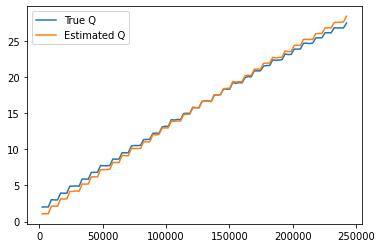

In [16]:
true_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole_20230323014433/true_q.csv',header=None)
estimated_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole_20230323014433/estimated_q.csv',header=None)

true_q.columns = ['0', 'training steps', 'True Q']
estimated_q.columns = ['0', 'training steps', 'Estimated Q']

plt.plot(true_q['training steps'],true_q['True Q'])
plt.plot(estimated_q['training steps'],estimated_q['Estimated Q'])
plt.legend(['True Q','Estimated Q'])